In [1]:
import numpy as np
import os 
import pickle
import cv2
import matplotlib.pyplot as plt

#### Loading data

In [2]:
data_path = os.path.join('..', 'data', 'data.pkl')
with open(data_path, "rb") as f:
    data = pickle.load(f)

#### Display data

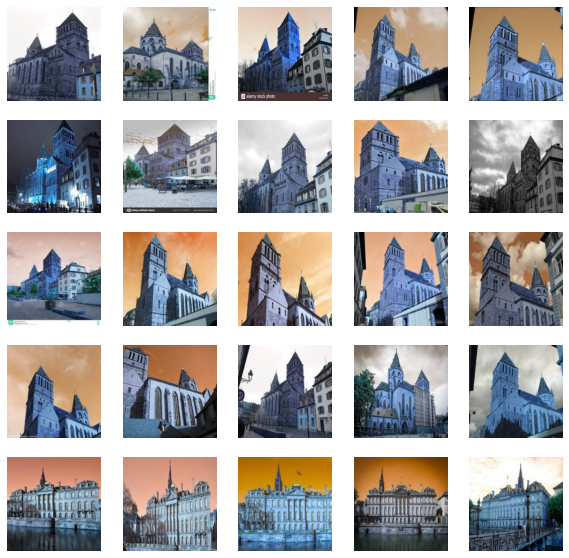

In [3]:
i = np.random.randint(0, data['images'].shape[0] - 25)

plt.figure(figsize=(10, 10))
for j in range(25):
  plt.subplot(5, 5, j+1)
  plt.imshow(data['images'][i])
  plt.axis('off')
  i = i + 1
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data['images'] / 255.,
                                                   data['y'],
                                                   random_state = 1,
                                                   test_size = .1, 
                                                    stratify=data['y'])
y_train_cat = to_categorical(y_train, 7)
y_test_cat = to_categorical(y_test, 7)

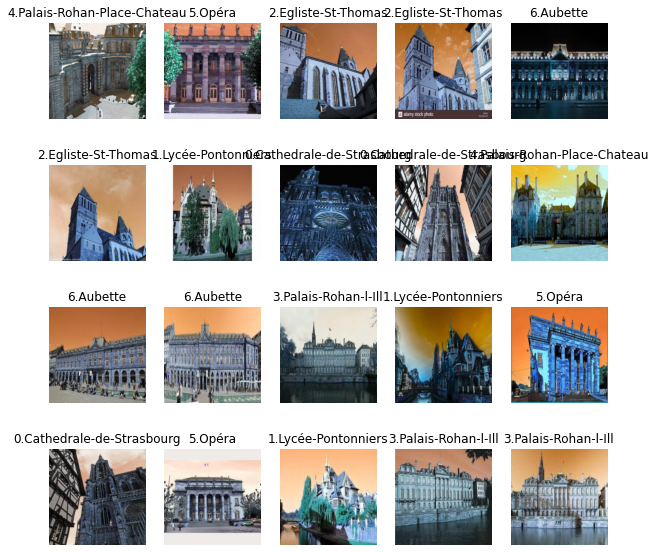

In [6]:
plt.figure(figsize=(10, 10))
for j in range(X_test.shape[0]):
  plt.subplot(4, 5, j+1)
  plt.imshow(X_test[j])
  plt.axis('off')
  plt.title(data['target_names'][y_test[j]])
plt.show()

In [7]:
y_test

array([4, 5, 2, 2, 6, 2, 1, 0, 0, 4, 6, 6, 3, 1, 5, 0, 5, 1, 3, 3])

In [8]:
base_model = VGG16(weights=None, include_top=False, 
             input_shape=X_train.shape[1:])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
data_gen = ImageDataGenerator(rotation_range=15, zoom_range=[.8, 1.2], shear_range=5)
data_gen.fit(X_train)

In [11]:
x = base_model.get_layer('block2_pool').output
x = Flatten(name='flatten_layer')(x)
x = Dense(512, activation='relu')(x)
x = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.inputs, outputs=x)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.fit(data_gen.flow(X_train, y_train_cat, batch_size=32),
          validation_data=(X_test, y_test_cat), epochs=10)
#           steps_per_epoch=len(X_train) / 32 )

Epoch 1/10
6/6 [==============================] - 207s 35s/step - loss: 16.9772 - acc: 0.1517 - val_loss: 2.2035 - val_acc: 0.1500
Epoch 2/10
6/6 [==============================] - 72s 12s/step - loss: 1.9691 - acc: 0.1011 - val_loss: 1.9454 - val_acc: 0.1500
Epoch 3/10
1/6 [====>.........................] - ETA: 43s - loss: 1.9434 - acc: 0.3125

In [ ]:
new_images = data_gen.flow(X_train, y_train_cat, batch_size=32)

images, category = next(new_images)

plt.figure(figsize=(15, 15))
for j in range(images.shape[0]):
  plt.subplot(8, 4, j+1)
  plt.imshow(images[j])
  plt.axis('off')
  plt.title(data['target_names'][np.argmax(category[j])])
plt.show()

In [ ]:
pred = list()

for i in range(X_test.shape[0]):
  pred.append(np.argmax(model.predict(X_test)[i]))

pred = np.array(pred)

pred

In [ ]:
pred, y_test

In [ ]:
plt.figure(figsize=(10, 10))
for j in range(X_test.shape[0]):
  plt.subplot(4, 5, j+1)
  plt.imshow(X_test[j])
  plt.axis('off')
  plt.title(data['target_names'][pred[j]])
plt.show()